In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('ADANIGREEN.csv')
print(df.head())

         Date       Open       High        Low      Close  Adj Close   Volume
0  2018-06-18  30.000000  31.500000  28.500000  31.500000  31.500000  7006229
1  2018-06-19  32.700001  33.049999  31.000000  32.599998  32.599998  2895692
2  2018-06-20  31.500000  32.200001  31.000000  31.000000  31.000000  1115553
3  2018-06-21  29.450001  30.000000  29.450001  29.650000  29.650000  2854524
4  2018-06-22  28.200001  29.799999  28.200001  29.450001  29.450001  1612972


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())
X = df[['Date_ordinal']]
y = df['Close']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
last_date = df['Date'].max()  # Last date in the dataset
next_month_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
next_month_dates_ordinal = next_month_dates.map(lambda date: date.toordinal()).values.reshape(-1, 1)
next_month_pred = model.predict(next_month_dates_ordinal)

C:\Users\rishu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 979.2819232611018


In [10]:
X_test_dates = [datetime.fromordinal(int(date)) for date in X_test['Date_ordinal']]
next_month_dates = [datetime.fromordinal(int(date.toordinal())) for date in next_month_dates]

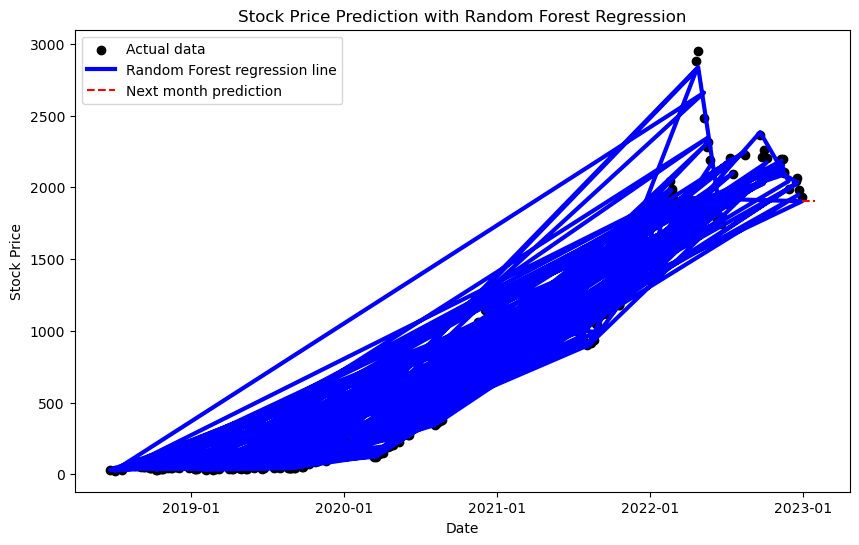

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_dates, y_test, color='black', label='Actual data')
plt.plot(X_test_dates, y_pred, color='blue', linewidth=3, label='Random Forest regression line')
plt.plot(next_month_dates, next_month_pred, color='red', linestyle='dashed', label='Next month prediction')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with Random Forest Regression')
plt.legend()
plt.show()